In [66]:
#Análise em base de dados da Chegada de Turistas Internacionais

#importação de bibliotecas que trabalham com dados tabulados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importando os dataset
dados2010 = pd.read_csv('chegadas_2010.csv', delimiter=';')
dados2011 = pd.read_csv('chegadas_2011.csv', delimiter=';')
dados2012 = pd.read_csv('chegadas_2012.csv', delimiter=';')
dados2013 = pd.read_csv('chegadas_2013.csv', delimiter=';')
dados2014 = pd.read_csv('chegadas_2014.csv', delimiter=';')
dados2015 = pd.read_csv('chegadas_2015.csv', delimiter=';')
dados2016 = pd.read_csv('chegadas_2016.csv', delimiter=';')
dados2017 = pd.read_csv('chegadas_2017.csv', delimiter=';')
dados2018 = pd.read_csv('chegadas_2018.csv', delimiter=';')
dados2019 = pd.read_csv('chegadas_2019.csv', delimiter=';')
dados2019.head()

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Maio,5,0


In [15]:
relacaoColunas = {'cod continente':'Ordem continente', 'cod pais':'Ordem país', 'ano':'Ano', 'cod via':'Ordem via de acesso', 'cod mes':'Ordem mês', 'cod uf':'Ordem UF', 'Via':'Via de acesso'}

dados2010 = dados2010.rename(columns=relacaoColunas)
dados2011 = dados2011.rename(columns=relacaoColunas)
dados2012 = dados2012.rename(columns=relacaoColunas)
dados2013 = dados2013.rename(columns=relacaoColunas)
dados2014 = dados2014.rename(columns=relacaoColunas)
dados2015 = dados2015.rename(columns=relacaoColunas)
dados2016 = dados2016.rename(columns=relacaoColunas)
dados2017 = dados2017.rename(columns=relacaoColunas)
dados2018 = dados2018.rename(columns=relacaoColunas)
dados2019 = dados2019.rename(columns=relacaoColunas)

In [16]:
#Cocatenação dos datasets (ou datagframes)
dados = pd.concat([dados2010, dados2011, dados2012, dados2013, dados2014, dados2015, dados2016, dados2017, dados2018, dados2019])

In [18]:
dados.describe()

,Ordem continente,Ordem país,Ordem UF,Ordem via de acesso,Ano,Ordem mês,Chegadas,Unnamed: 12
count,346596.000000,346596.000000,346596.000000,346596.000000,346596.000000,346596.000000,343908.000000,0.0
mean,4.483191,181.946266,22.024790,2.096700,2015.379046,6.500000,177.171194,NaN
std,1.843972,247.754133,24.851954,1.087856,2.740043,3.452058,2184.248072,NaN
min,1.000000,2.000000,1.000000,1.000000,2010.000000,1.000000,0.000000,NaN
25%,3.000000,57.000000,7.000000,1.000000,2013.000000,3.750000,0.000000,NaN
50%,5.000000,117.000000,17.000000,2.000000,2016.000000,6.500000,0.000000,NaN
75%,6.000000,184.000000,23.000000,3.000000,2018.000000,9.250000,4.000000,NaN
max,8.000000,999.000000,99.000000,4.000000,2019.000000,12.000000,386823.000000,NaN


In [43]:
#Verificando se existem dados válidos na coluna Unnamed: 12
#dados.loc[dados['Ano'] > 2017]

dados.loc[dados['Unnamed: 12'] > -1]

,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas,Unnamed: 12


In [44]:
dados = dados.drop(columns=['Unnamed: 12'])
dados.head()

,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2010,janeiro,1,3.0
1,África,1,Angola,6,Amazonas,4,Aérea,1,2010,janeiro,1,1.0
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2010,janeiro,1,0.0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2010,janeiro,1,0.0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2010,janeiro,1,0.0


In [47]:
dados['Continente'].describe()

count     346596
unique         8
top       Europa
freq      125316
Name: Continente, dtype: object

In [48]:
dados['Continente'].unique()

array(['África', 'América Central e Caribe', 'América do Norte',
       'América do Sul', 'Ásia', 'Europa', 'Oceania',
       'Continente não especificado'], dtype=object)

In [56]:
dados['Mês'].unique()

array(['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho',
       'agosto', 'setembro', 'outubro', 'novembro', 'dezembro', 'Janeiro',
       'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto',
       'Setembro', 'Outubro', 'Novembro', 'Dezembro'], dtype=object)

In [59]:
#normaliza os dados que representam o mesmo valor
dados['Mês'] = dados['Mês'].replace(to_replace=['janeiro'],value='Janeiro')
dados['Mês'] = dados['Mês'].replace(to_replace=['fevereiro'],value='Fevereiro')
dados['Mês'] = dados['Mês'].replace(to_replace=['março'],value='Março')
dados['Mês'] = dados['Mês'].replace(to_replace=['abril'],value='Abril')
dados['Mês'] = dados['Mês'].replace(to_replace=['maio'],value='Maio')
dados['Mês'] = dados['Mês'].replace(to_replace=['junho'],value='Junho')
dados['Mês'] = dados['Mês'].replace(to_replace=['julho'],value='Julho')
dados['Mês'] = dados['Mês'].replace(to_replace=['agosto'],value='Agosto')
dados['Mês'] = dados['Mês'].replace(to_replace=['setembro'],value='Setembro')
dados['Mês'] = dados['Mês'].replace(to_replace=['outubro'],value='Outubro')
dados['Mês'] = dados['Mês'].replace(to_replace=['novembro'],value='Novembro')
dados['Mês'] = dados['Mês'].replace(to_replace=['dezembro'],value='Dezembro')
dados.head()

,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2010,Janeiro,1,3.0
1,África,1,Angola,6,Amazonas,4,Aérea,1,2010,Janeiro,1,1.0
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2010,Janeiro,1,0.0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2010,Janeiro,1,0.0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2010,Janeiro,1,0.0


In [65]:
dados['Mês'].describe()

count     346596
unique        12
top        Julho
freq       28883
Name: Mês, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

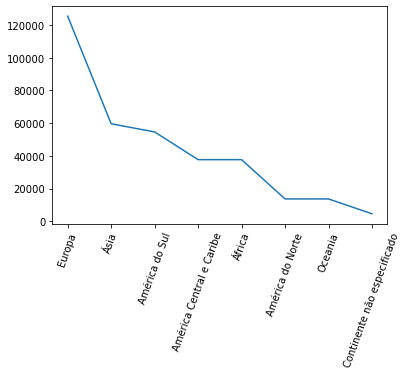

In [84]:
plt.plot(dados['Continente'].value_counts())
plt.xticks(rotation=70)

In [ ]:
dados.plot.bar(stacked=True);